In [1]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [2]:
from math import pi, e
import matplotlib.pyplot as plt
import torch
from SourceCode.utilities import nth_derivative
from SourceCode.EquationClass import OneDimensionalMainEquation
from SourceCode.DomainClass import OneDimensionalSimpleDomain
from SourceCode.InitConditionClass import OnePointInitialCondition
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.ReportMaker import ReportMaker
import time


n_epochs = 10
n_points = 10
dh = 1e-3

# Example №1
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5}) cos(t) $$
$$ u(0)=0 $$
$$ u(1)= sin(1)*exp(-0.2) $$
$$ t \in [0,1] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [3]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model: nth_derivative(nn_model, x, 2)
    + 0.2 * nth_derivative(nn_model, x, 1)
    + nn_model(x)
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 20
true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 3.2568350434303284e-06
Valid max absolute error |Appr(x)-y(x)|: 3.248453140258789e-06
MAPE on train data: 0.0004400628313305788 %
MAPE on validation data: 0.0004210269707982661 %
Max residual square loss on train at last epoch: 0.00034005194902420044 


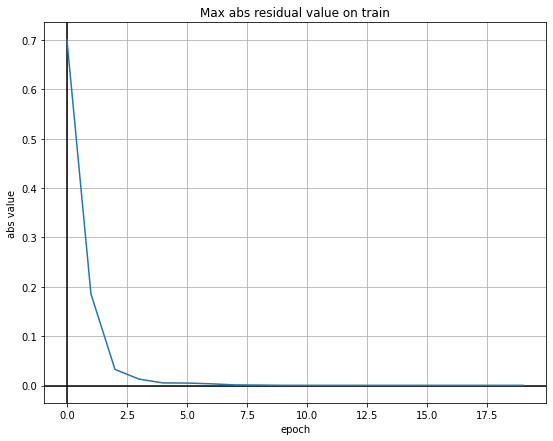

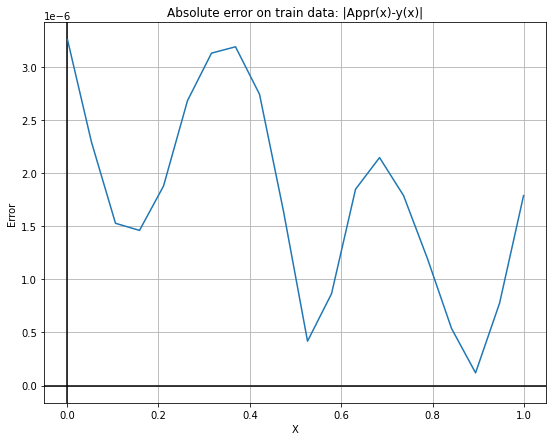

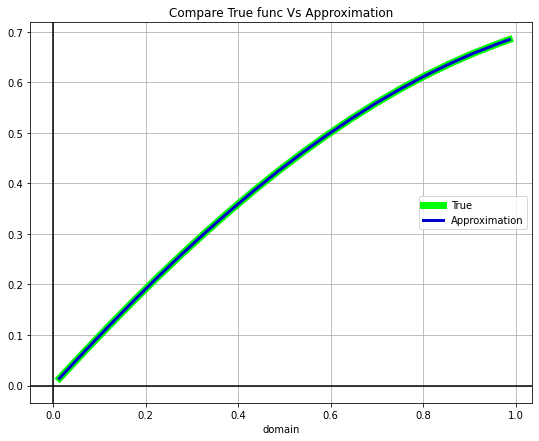

In [4]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

lets try to solve the same problem but on a smaller domain $x \in [0, 0.1]$

In [5]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model: nth_derivative(nn_model, x, 2)
    + 0.2 * nth_derivative(nn_model, x, 1)
    + nn_model(x)
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 20
true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, 0.1, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.004871279001235962
Valid max absolute error |Appr(x)-y(x)|: 0.004808664321899414
MAPE on train data: 4.966942220926285 %
MAPE on validation data: 4.966980963945389 %
Max residual square loss on train at last epoch: 0.0007919222116470337 


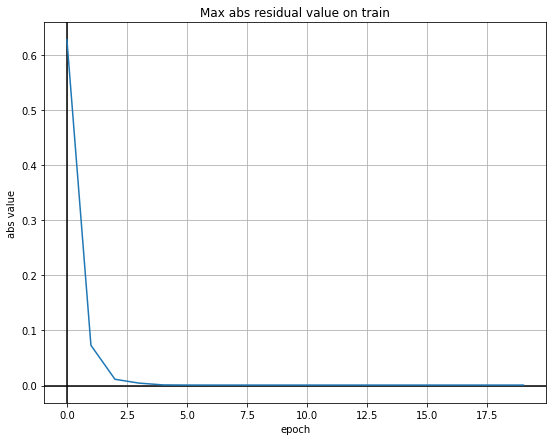

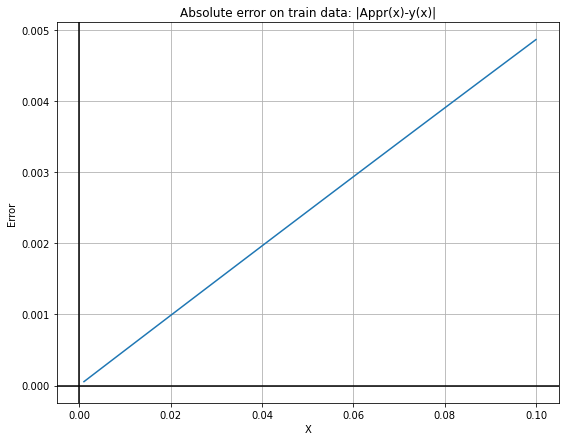

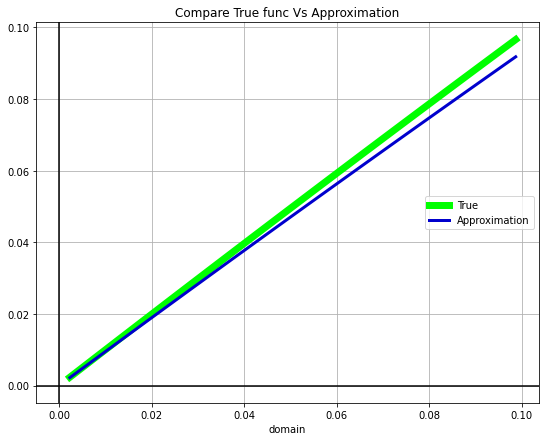

In [6]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

it is strange but descpite my expectations here on a smaller domain NN function performs worse

# Example №2
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,2] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [7]:
left_bound = 0
right_bound = 2
main_eq_residual = (
        lambda x, nn_model: nth_derivative(nn_model, x, 2)
        + 0.2 * nth_derivative(nn_model, x, 1)
        + nn_model(x)
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 20
true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model,x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 4.4465065002441406e-05
Valid max absolute error |Appr(x)-y(x)|: 4.45246696472168e-05
MAPE on train data: 0.005088711986900307 %
MAPE on validation data: 0.005094270454719663 %
Max residual square loss on train at last epoch: 0.0005919486284255981 


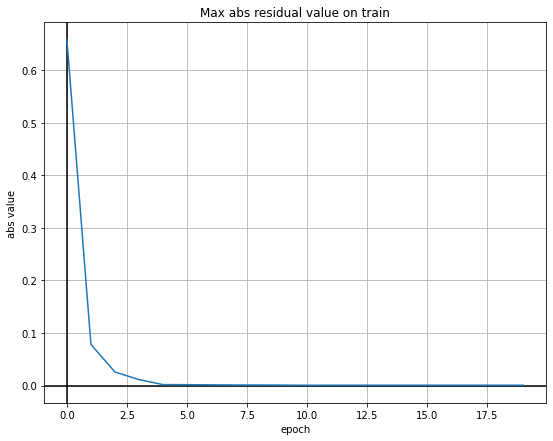

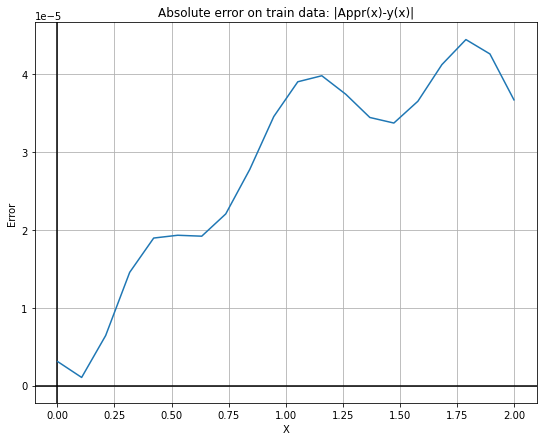

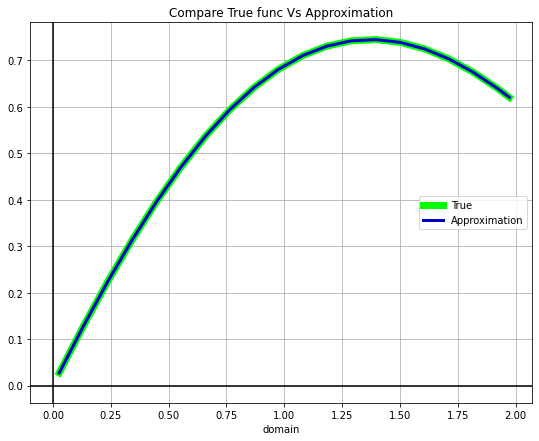

In [8]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

In [9]:
data = torch.linspace(0,10,100)
data = data.view(-1,1)

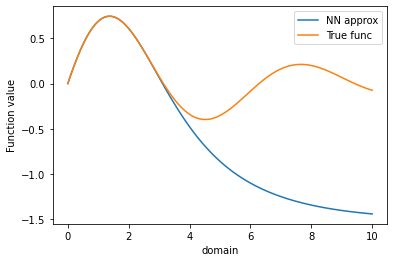

In [11]:
plt.plot(data, nn_model[0](data).detach().numpy(), label='NN approx')
plt.plot(data, true_solution(data).detach().numpy(), label='True func')
plt.xlabel("domain")
plt.ylabel("Function value")
plt.legend()

hmm, apparently neural networks are not good at extrapolation of an unknown function

$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,10] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

lets try to solve the same problem but with a bigger domain, $t \in [0,10]$

In [12]:
left_bound = 0
right_bound = 10
main_eq_residual = (
        lambda x, nn_model: nth_derivative(nn_model, x, 2)
        + 0.2 * nth_derivative(nn_model, x, 1)
        + nn_model(x)
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 100
true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)

main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.008805274963378906
Valid max absolute error |Appr(x)-y(x)|: 0.00880420207977295
MAPE on train data: 1.8393754959106445 %
MAPE on validation data: 1.8403075635433197 %
Max residual square loss on train at last epoch: 0.010072916746139526 


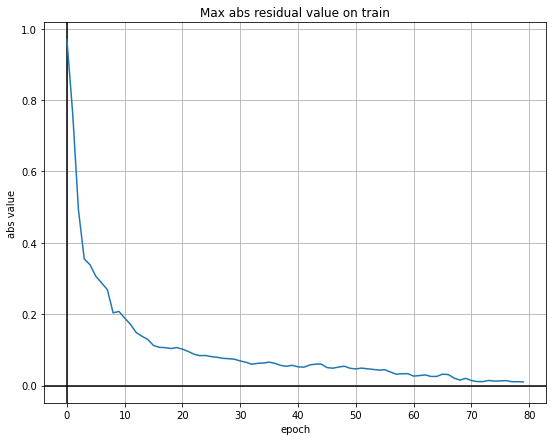

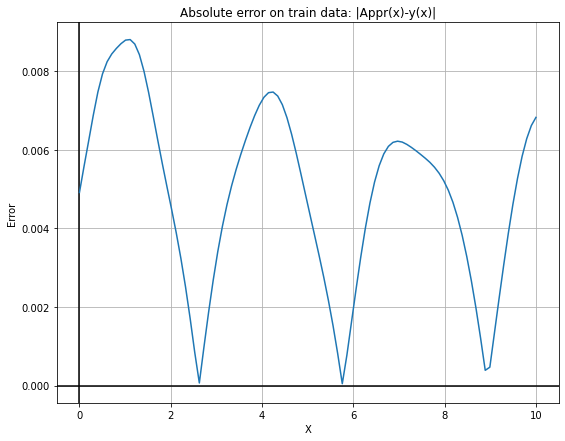

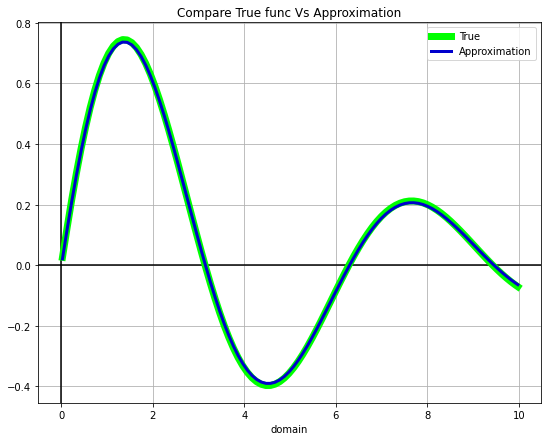

In [13]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

as you can see if domain is big then NN cannot approximate unknown function on a big domain properly

# Example №3
$$ u' + 0.2u = exp(- \frac{t}{5})cos(t) $$
$$ u(0) = 0 $$
$$ t \in [0,20] $$ 
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [14]:
left_bound = 0
right_bound = 20
main_eq_residual = (
    lambda variable, function: nth_derivative(function, variable, 1)
    + 0.2 * function(variable)
    -  torch.exp(-variable / 5) * torch.cos(variable)
)
n_points = 40
true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(0, first_init_cond_res)

boundary_conditions = [first_init_cond]


main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.09072055667638779
Valid max absolute error |Appr(x)-y(x)|: 0.09126483649015427
MAPE on train data: 16.35701358318329 %
MAPE on validation data: 16.360077261924744 %
Max residual square loss on train at last epoch: 0.06381763517856598 


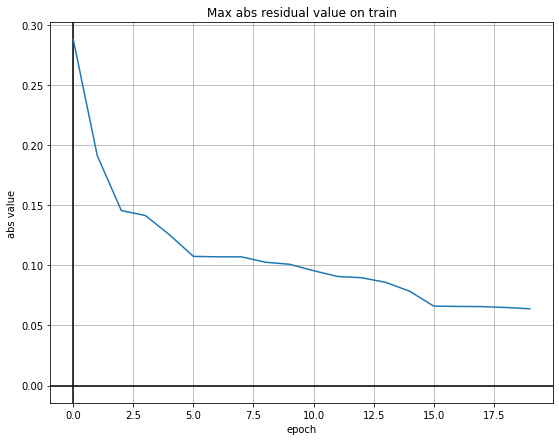

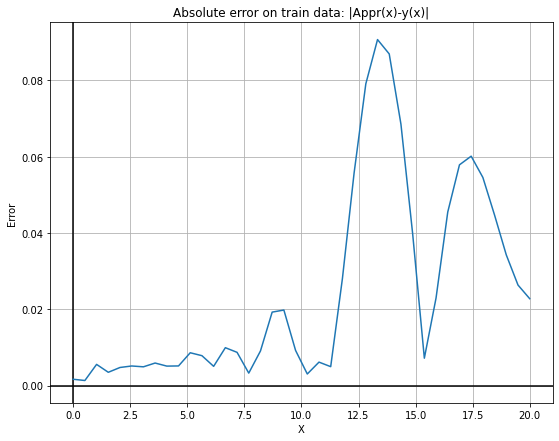

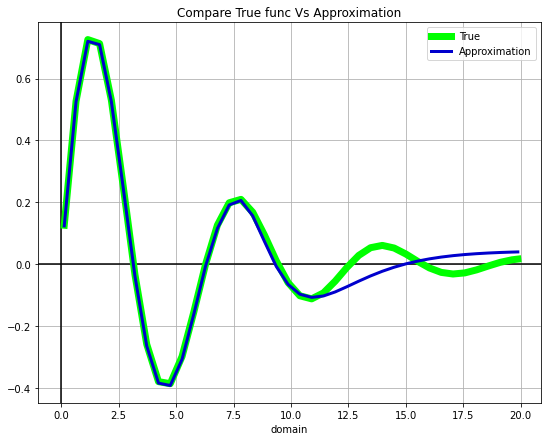

In [15]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №4
$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,2] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

In [16]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function(variable)
    - torch.cos(torch.tensor([2.0],requires_grad=True) * variable)
)
n_points = 20
true_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.00013703107833862305
Valid max absolute error |Appr(x)-y(x)|: 0.00013449788093566895
MAPE on train data: 0.012239909847266972 %
MAPE on validation data: 0.012291508028283715 %
Max residual square loss on train at last epoch: 0.0060637593269348145 


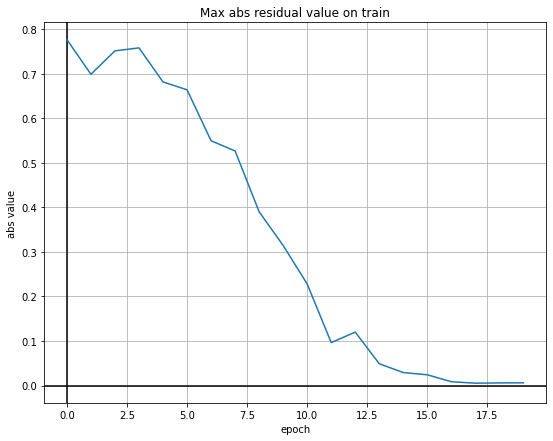

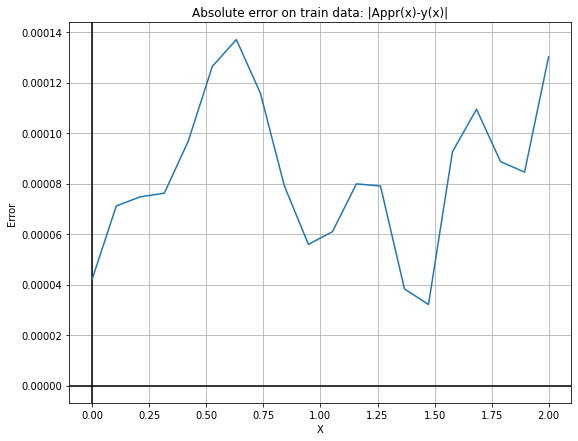

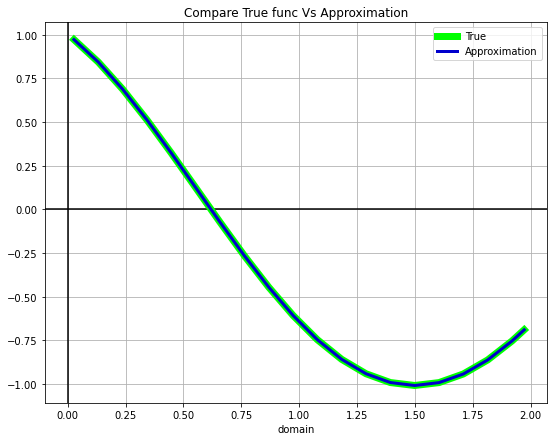

In [17]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,10] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

Again, if we expand domain we will see that there is no convergence. But we can resolve this issue by adding extra points to domain

In [18]:
left_bound = 0
right_bound = 5
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function(variable)
    - torch.cos(torch.tensor([2.0],requires_grad=True)*variable)
)
n_points = 50
true_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) + torch.tensor([1.0], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.001775503158569336
Valid max absolute error |Appr(x)-y(x)|: 0.0017735958099365234
MAPE on train data: 0.1680470653809607 %
MAPE on validation data: 0.16761926235631108 %
Max residual square loss on train at last epoch: 0.007682383060455322 


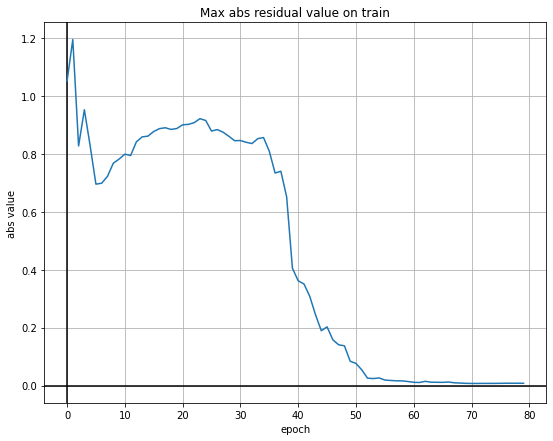

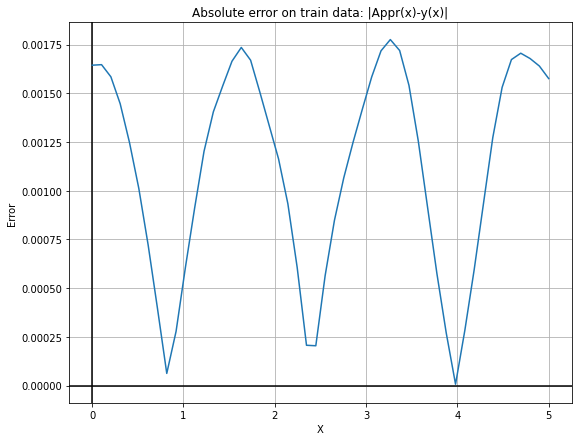

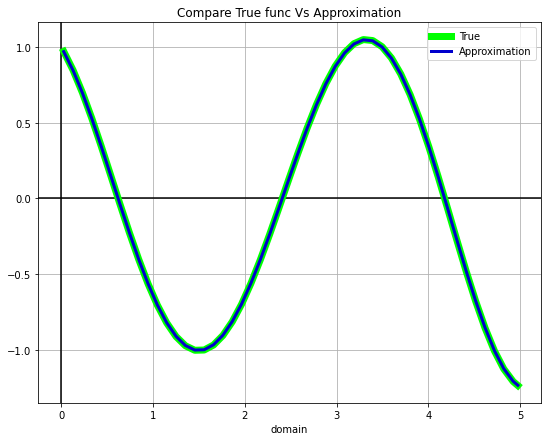

In [19]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №5
$$ u''' - 3u'' + 3u' -u = exp(t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ u''(0)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = \frac{1}{6} * exp(t) * (t^3 + 12*t^2-12*t+6) $$

In [20]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: 
      nth_derivative(function, variable, 3)
    - torch.tensor([3.0]) * nth_derivative(function, variable, 2)
    + torch.tensor([3.0]) * nth_derivative(function, variable, 1)
    - function(variable)
    - torch.exp(variable)
)
n_points = 20
true_solution = lambda x: torch.exp(x) * 1/6 * (x*x*x + 12*x*x- 12*x + 6)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 2) - torch.tensor([1.0],requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 1.5536530017852783
Valid max absolute error |Appr(x)-y(x)|: 1.4667625427246094
MAPE on train data: 27.56448984146118 %
MAPE on validation data: 27.909424901008606 %
Max residual square loss on train at last epoch: 1.0659048557281494 


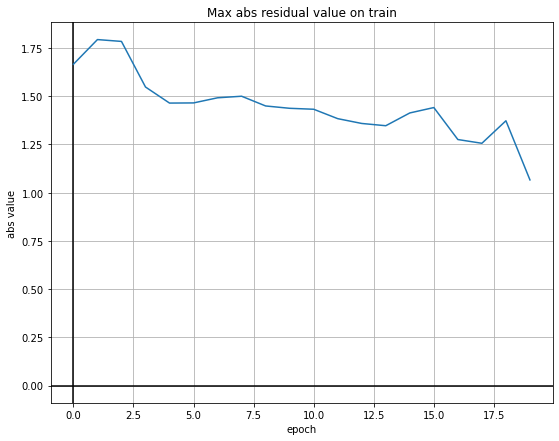

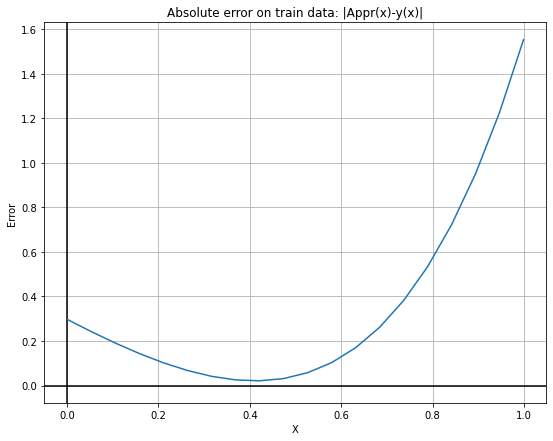

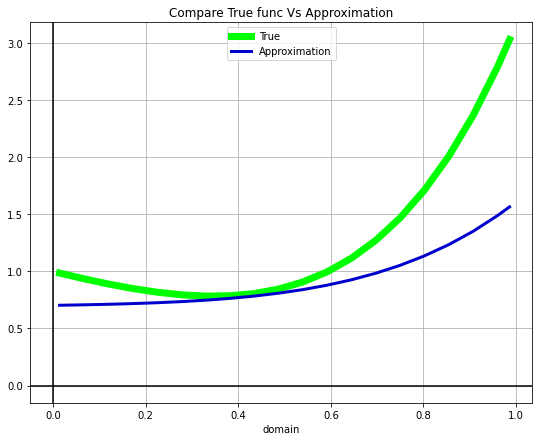

In [21]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №6
$$ u'' + u = -t $$
$$ u(0)=0 $$
$$ t \in [0,1] $$
$$ true\_solution = \frac{sin(x)}{sin(1)} - t $$

In [22]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function(variable)
    + variable
)
n_points = 20
true_solution = lambda x: torch.sin(x)/torch.sin(torch.Tensor([1])) - x
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([0.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - 0
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 4.023662768304348e-06
Valid max absolute error |Appr(x)-y(x)|: 3.7420541048049927e-06
MAPE on train data: 0.004374778291094117 %
MAPE on validation data: 0.004340997838880867 %
Max residual square loss on train at last epoch: 0.0001270269276574254 


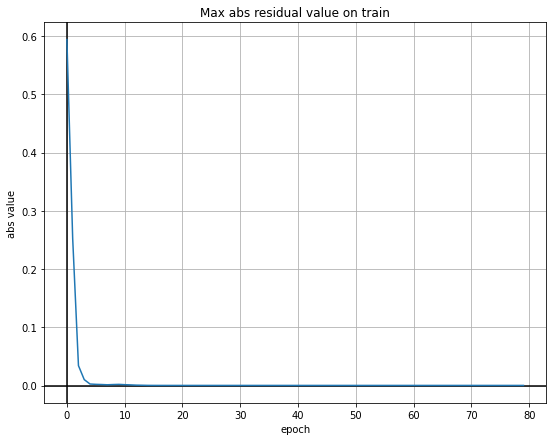

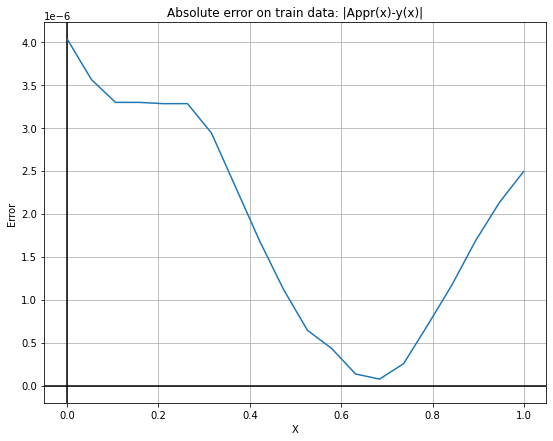

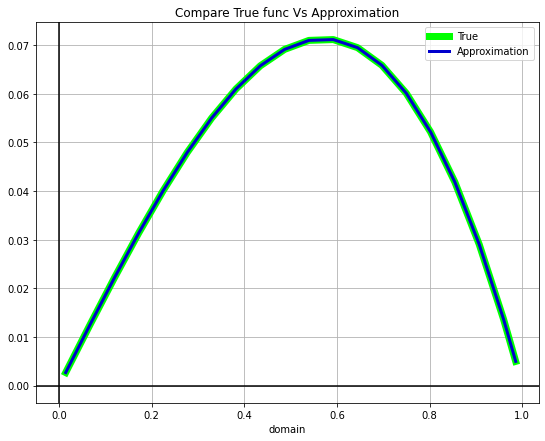

In [23]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №6
$$ u'' + u = 1 $$
$$ u'(0)=0 $$
$$ u(\frac{\pi}{2})-u'(\frac{\pi}{2})= 2 $$
$$ t \in [0,1] $$
$$ true\_solution = 1 + cos(t) $$

In [24]:
left_bound = 0
right_bound = pi/2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function(variable)
    - 1
)
n_points = 20
true_solution = lambda x: torch.Tensor([1]) + torch.cos(x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - nth_derivative(nn_model, x, 1) - 2
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 3.039836883544922e-05
Valid max absolute error |Appr(x)-y(x)|: 3.0279159545898438e-05
MAPE on train data: 0.0013192765436542686 %
MAPE on validation data: 0.0013117248272465076 %
Max residual square loss on train at last epoch: 0.0006012916564941406 


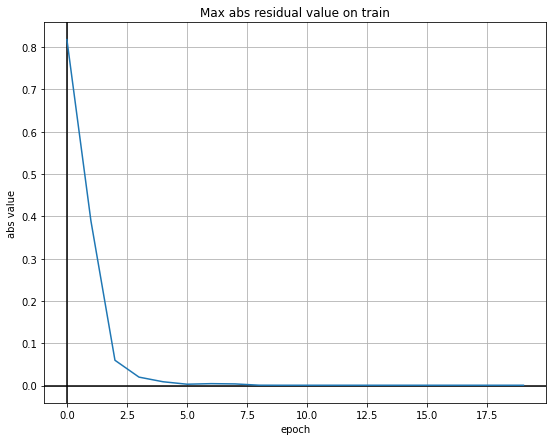

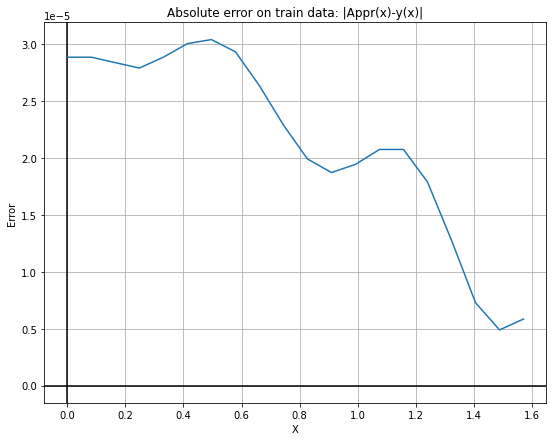

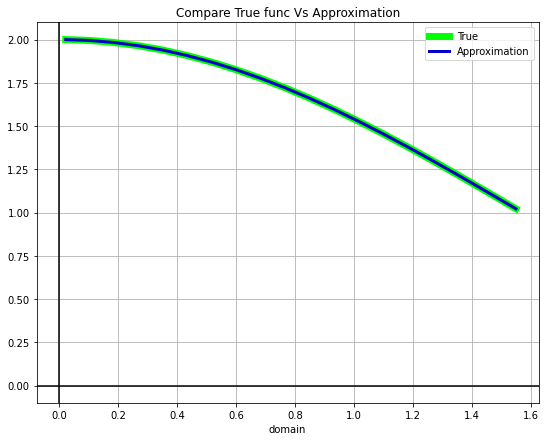

In [25]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №7
$$ u'' - u = 4exp(t) $$
$$ u(0)=0 $$
$$ u'(o)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = 2t*exp(t) - sinh(t) $$

In [26]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: nth_derivative(function, variable, 2)
    - function(variable)
    - torch.tensor([4.0],requires_grad=True) * torch.exp(variable)
)
n_points = 20
true_solution = lambda x: 2 * x * torch.exp(x) - torch.sinh(x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) - torch.tensor([1.0], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.0002040863037109375
Valid max absolute error |Appr(x)-y(x)|: 0.000194549560546875
MAPE on train data: 0.005506601883098483 %
MAPE on validation data: 0.005394055915530771 %
Max residual square loss on train at last epoch: 0.0031871795654296875 


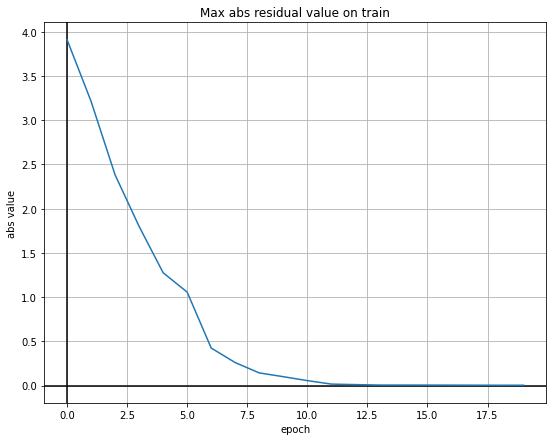

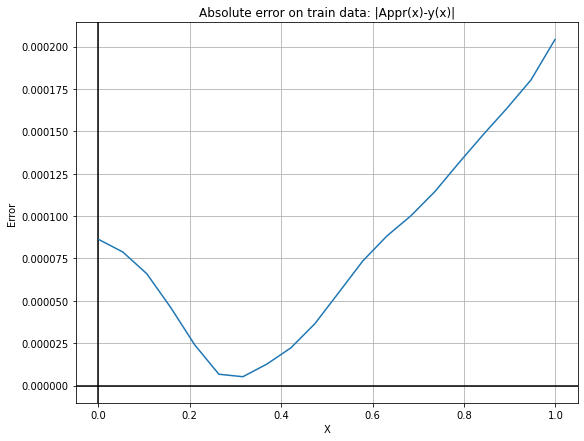

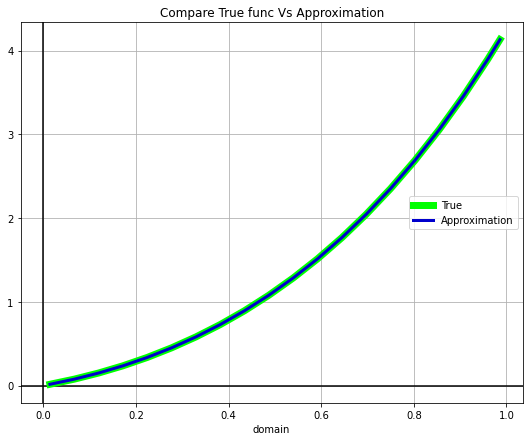

In [27]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №8
$$ (1+t^2)u''-2tu = 0 $$
$$ u(0)=0 $$
$$ u'(0)=3 $$
$$ t \in [0,1] $$
$$ true\_solution = t^3 + 3*t $$

In [28]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: (torch.tensor([1.0],requires_grad=True) + variable*variable)
    * nth_derivative(function, variable, 2)
    - 2 * variable * function(variable)
)
n_points = 20
true_solution = lambda x: (3*x + pow(x,4)/2 - pow(x,6)/5 + pow(x,7)/42 + 
                           3*pow(x,8)/28 - 7*pow(x,9)/360 - 25*pow(x,10)/378)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) - torch.tensor([3.0], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.034322500228881836
Valid max absolute error |Appr(x)-y(x)|: 0.029708147048950195
MAPE on train data: 0.23321353364735842 %
MAPE on validation data: 0.23442772217094898 %
Max residual square loss on train at last epoch: 0.0013365616323426366 


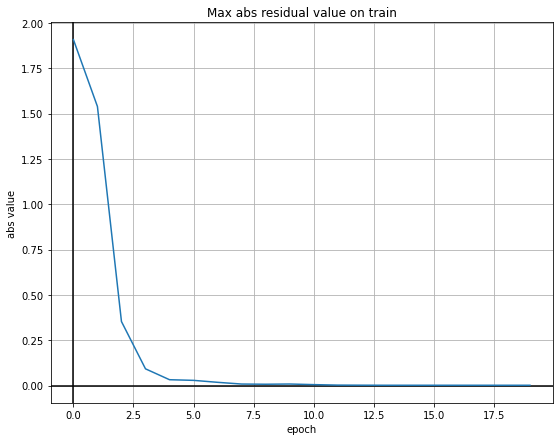

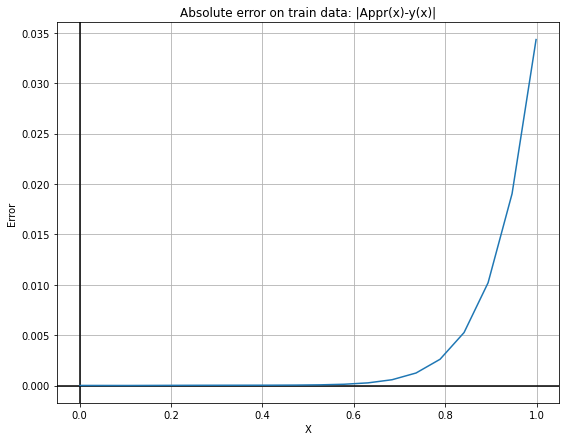

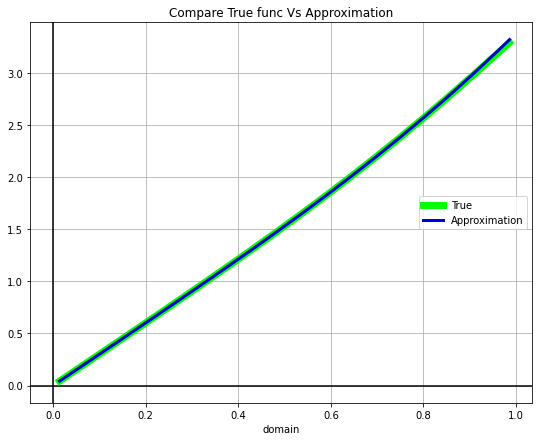

In [29]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №9
$$ u'''+ u'' = \frac{t-1}{t^2} $$
$$ u(1) = \frac{1+e}{e} $$
$$ u'(1) = -\frac{1+e}{e} $$
$$ u''(1) = \frac{1-e}{e} $$
$$ t \in [1,2] $$
$$ true\_sol =  -4t + tln(t) + 7 - 2exp(1-t) + exp(-t) $$

In [30]:
left_bound = 1
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 2)
    - (variable-1)/(variable**2)
)
n_points = 20
true_solution = lambda x: -x*4 + x * torch.log(x) + 7 - 2 * torch.exp(1-x) + torch.exp(-x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - (1+e)/e
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model,x,1) + torch.tensor([(1+e)/e], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model,x,2) - torch.tensor([(1-e)/e], requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 1.6614794731140137e-06
Valid max absolute error |Appr(x)-y(x)|: 1.6838312149047852e-06
MAPE on train data: 0.00015544485449936474 %
MAPE on validation data: 0.00015162706858973252 %
Max residual square loss on train at last epoch: 0.00040921568870544434 


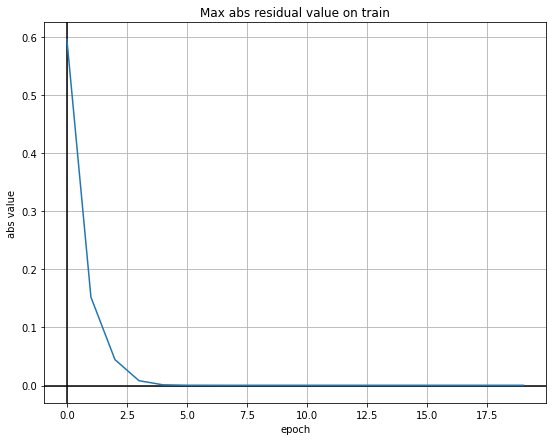

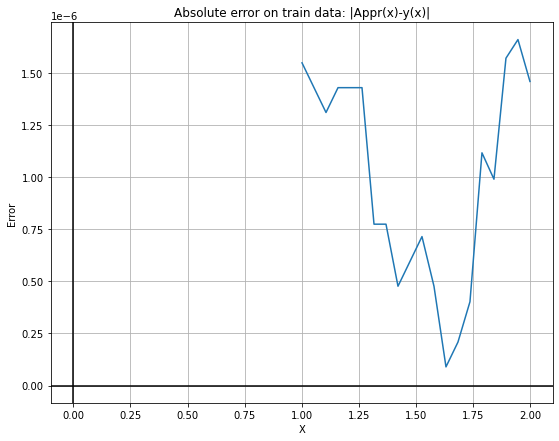

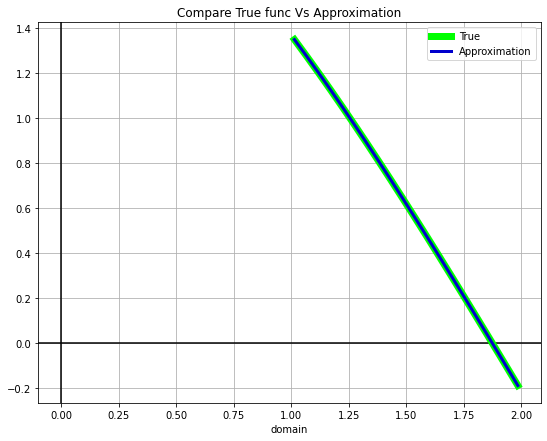

In [31]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №10
$$ u''''+ u'' = \frac{1 + sin^2(t)}{cos^3(t)} $$
$$ u(0) = 1 $$
$$ u'(0) = 0  $$
$$ u''(0) = 0 $$
$$ u'''(0) = 0 $$
$$ t \in [0, 1] $$ 
$$ true\_sol =  (1 + ln(cos(t)))*cos(t) + t * sin(t) $$

In [32]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 4)
    + nth_derivative(function, variable, 2)
    - (torch.tensor([1.0],requires_grad=True) + torch.sin(variable)*torch.sin(variable))
    /(torch.cos(variable)*torch.cos(variable)*torch.cos(variable))
)
n_points = 20
true_solution = lambda x: ((torch.tensor([1.0],requires_grad=True) + torch.log(torch.cos(x))) 
                           * torch.cos(x) + x * torch.sin(x))
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

fourth_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 3)
fourth_init_cond = OnePointInitialCondition(left_bound, fourth_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond, fourth_init_cond]


main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.011956453323364258
Valid max absolute error |Appr(x)-y(x)|: 0.011935591697692871
MAPE on train data: 1.1137133464217186 %
MAPE on validation data: 1.1117943562567234 %
Max residual square loss on train at last epoch: 0.03991079330444336 


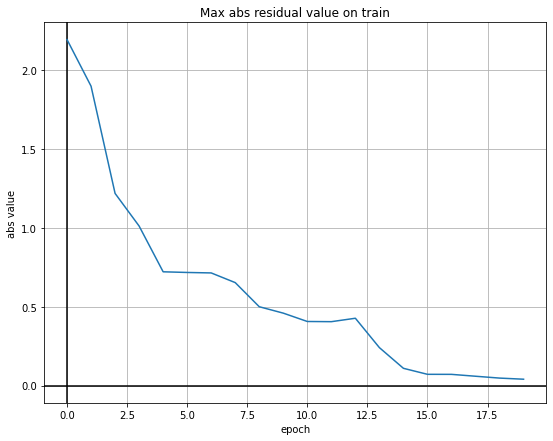

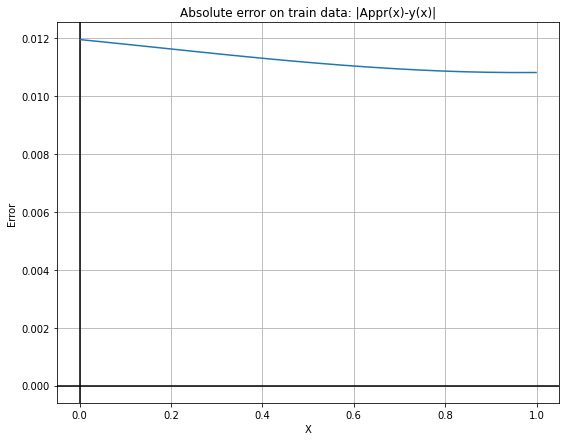

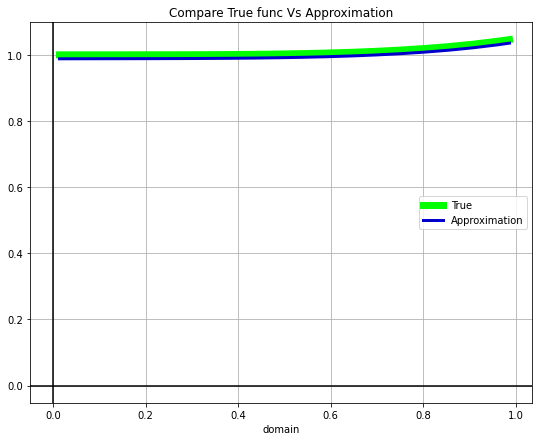

In [33]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №11
$$ u'''+ u' = t*sin(t) + 3*cos(t) $$
$$ u(0) = 1 $$
$$ u'(0) = 2  $$
$$ u''(0) = 0 $$
$$ t \in [0, 1] $$
$$ true\_sol =  1/4 * (-(t^2 - 17) * sin(t) - 9 * t * cos(t) + 4) $$

In [34]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 1)
    - variable * torch.sin(variable) - 3 * torch.cos(variable)
)
n_points = 20
true_solution = lambda x: 1/4*(-(x**2-17)*torch.sin(x)-9*x*torch.cos(x)+4)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model, x, 1) - torch.tensor([2.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model,x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]


main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 3.0994415283203125e-06
Valid max absolute error |Appr(x)-y(x)|: 2.86102294921875e-06
MAPE on train data: 6.367219498315535e-05 %
MAPE on validation data: 6.46286025585141e-05 %
Max residual square loss on train at last epoch: 0.00027370452880859375 


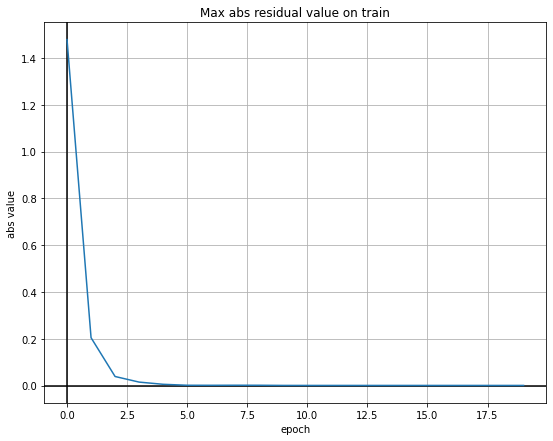

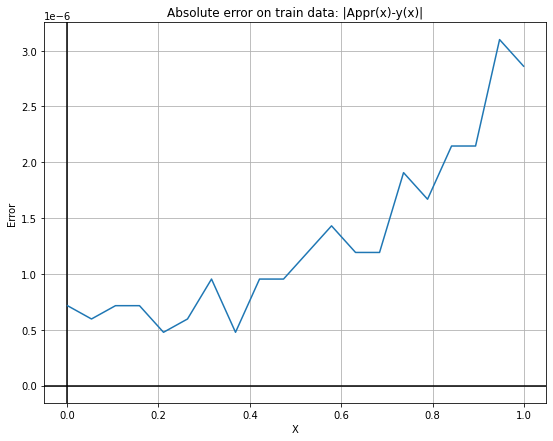

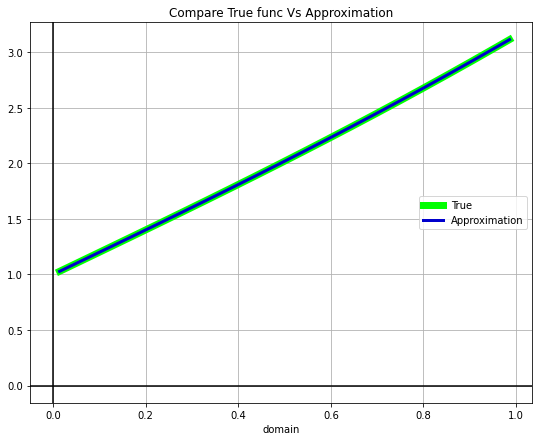

In [35]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №12. A physical problem 

A rubber cord with a length of **1** meter is extended by **kf** meters under the action of a force **f** kg. 

By how much will the same cord of length **l** and weight **m** be extended under the action of its own weight, if it is hung at one end?

$$ u'= \frac{km}{l}(l-x) $$
$$ u(0) = 0 $$
$$ x \in [0, l] $$
$$ true\_sol =  \frac{km}{2l}*(l-x)x $$

Lets assume that $l = 3$ meters, $m = 5$ kg, $k = 2\frac{Newton}{meter}$

In [36]:
l = 10
m = 5
k = 2
left_bound = 0
right_bound = l
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 1)
    - k*m/l*(l-variable)
)
n_points = 50
true_solution = lambda x: k*m/(2*l)*(2*l-x)*x
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

boundary_conditions = [first_init_cond]


main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.0023458003997802734
Valid max absolute error |Appr(x)-y(x)|: 0.0022611618041992188
MAPE on train data: 0.004809237725567073 %
MAPE on validation data: 0.004788651131093502 %
Max residual square loss on train at last epoch: 0.0019626617431640625 


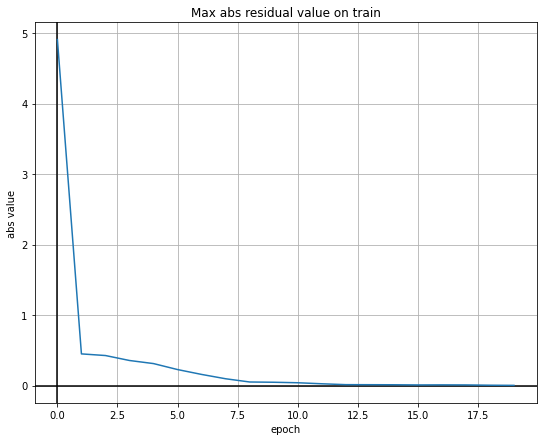

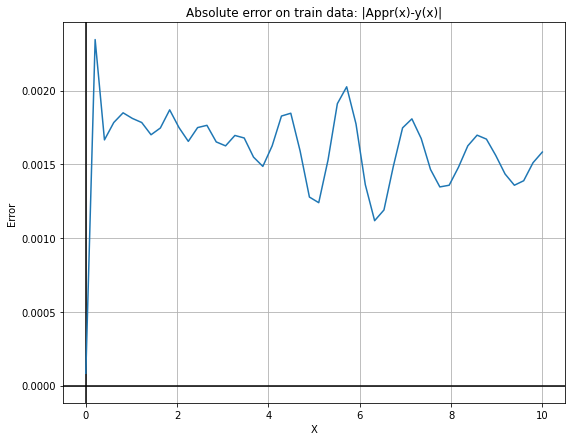

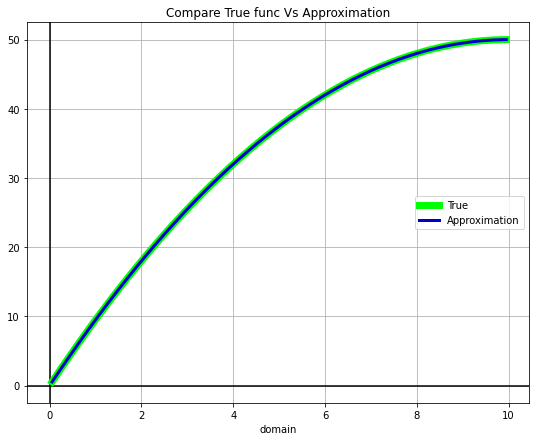

In [37]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №13
$$ y''+ xy' + \sqrt{x}T_x^{0.5} - 2y= -6x-4x^3 <=> y''+ 2xy' - 2y= -6x-4x^3$$
$$ y(0) = 0 $$
$$ y(1) = 0  $$
$$ x \in [0, 1] $$
$$ true\_sol =  x^2 - x^3 $$

In [38]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: 
    nth_derivative(function, variable, 2)
    + 2 * variable * nth_derivative(function, variable, 1)
    - 2 * function(variable)
    + 6 * variable + 4 * torch.pow(variable, 3)
)
n_points = 20
true_solution = lambda x: x * (1 - x * x)
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x)
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)
boundary_conditions = [first_init_cond, second_init_cond]


start_time = time.time()
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()
print("--- %s seconds ---" % (time.time() - start_time))

--- 2.7765774726867676 seconds ---


Train max absolute error |Appr(x)-y(x)|: 0.00023350422270596027
Valid max absolute error |Appr(x)-y(x)|: 0.00022760219871997833
MAPE on train data: 0.03667596320156008 %
MAPE on validation data: 0.03508667869027704 %
Max residual square loss on train at last epoch: 0.0020530223846435547 


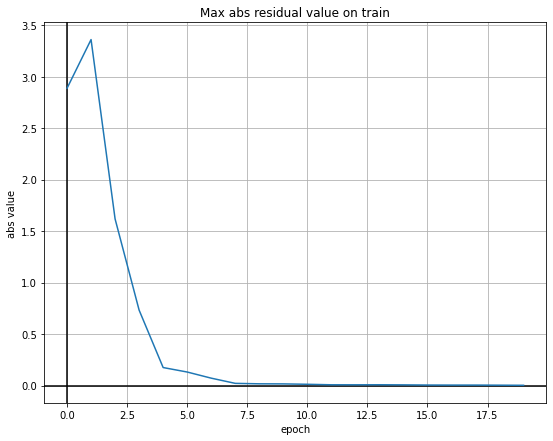

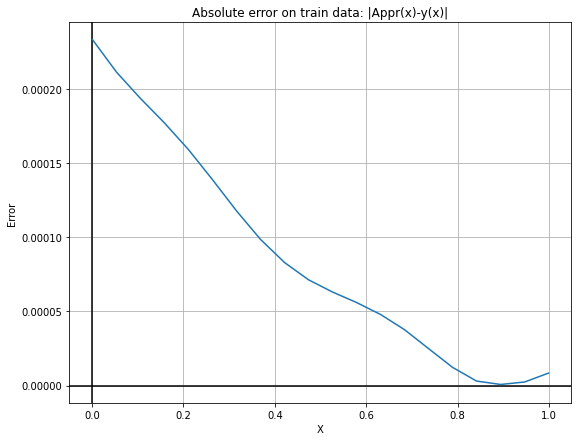

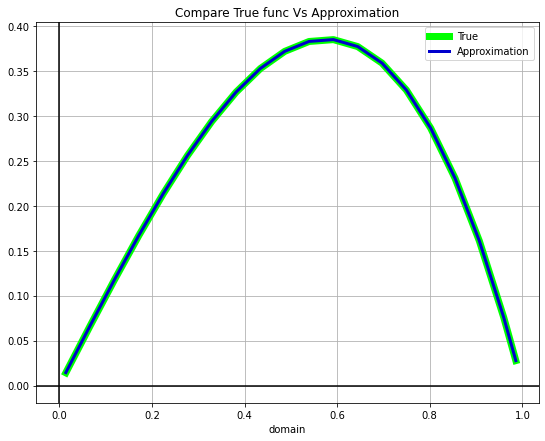

In [39]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

In [40]:
table_arr = main_domain.get_valid_domain()
table_arr = torch.cat([torch.Tensor([[left_bound]]), table_arr, torch.Tensor([[right_bound]])], dim = 0)